# O-C diagram 

O-C data was computed with the ephemeris in Hric et al. 2011 (used in Marchioni et al. 2018);
When using Vaccaro 2015, the o-c has asymmetric peaks in the o-c. I don't know if am doing something wrong when computing o-c.. if i use the ephemeris that Marchioni used I get the shape in o-c then the one he showed. However, I have a vertical shift in the o-c timings.

In [1]:
import os
from scipy.optimize import leastsq
from matplotlib.ticker import MultipleLocator

P.style.use(['seaborn-white', 'seaborn-paper', 'seaborn-ticks'])

# SET path to data
PATH = "/Users/bzaire/lsd/spectra/v471tau"

os.chdir(PATH)
# Read Eclipse timings
tE = N.genfromtxt('eclipse_timings.txt', unpack=True)


# Time of obseravtions in TT
t02 = 2452602.00000
t04 = 2453337.87674 
t05 = 2453718.72517
t14 = 2457021.96287
t15 = 2457031.50000
t21 = 2459569.32436

In [2]:
# set which ephemeris to consider
mode = 2
if mode == 0:
    ## Vaccaro et al. 2015
    dP = tE-2445821.898291
    c = 0.5211833875
    # Cycle
    E = N.array([round(idP/Prot) for idP in dP])
    oc = (dP-Prot*E)  #in days
    # define time to subtract for plots
    constant = 24.0e5
elif mode == 1:
    ## Guinan and Ribas 2001
    dP = tE-2440610.06406
    Prot =  0.521183398
    # Cycle
    E = N.array([round(idP/Prot) for idP in dP])
    oc = (dP-Prot*E)*24*3600.  #in seconds
    # define time to subtract for plots
    constant = 24.4e5
elif mode == 2: 
    ## Kundra and Hric 2011
    ## Hric et al. 2011
    dP = tE-2454028.452551
    Prot = 0.521183439
    # Cycle
    E = N.array([round(idP/Prot) for idP in dP])
    oc = (dP-Prot*E)*24*3600.  #in seconds
    # define time to subtract for plots
    constant = 24.4e5
    


## Fit a sin wave to o-c

In [3]:
guess_phase = 0.4; guess_freq = 35.*365.25; guess_amp = 150.;offset=0.
optimize_func = lambda c: c[0]*N.sin(2*N.pi/c[1]*(tE + c[2])) + c[3] - oc
est_amp, est_period, est_phase,est_offset = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, offset])[0]

print('K = %1.1f s' %est_amp)
print('Pmod = %1.1f yr' %(est_period/(365.)))
print('Phase = %1.1f d' %est_phase)
print('Offset = %1.1f s' %est_offset)



K = 155.4 s
Pmod = 35.3 yr
Phase = 19883.4 d
Offset = -11.1 s


## o-c, observing times, and fit curve 

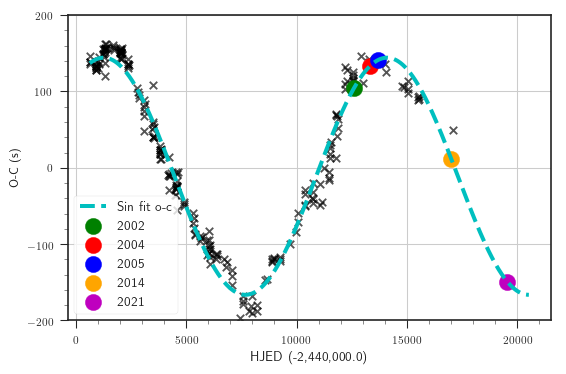

In [4]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=96)

# plot oc
ax1.scatter(tE-constant, oc, marker='x', c='k', alpha=2./3)

if mode == 0:
    # Plot fit from Vaccaro 2018
    x = N.linspace(N.min(tE), N.max(tE)+5000, 1000)
#   y = -0.0015*N.sin(2*N.pi/(10932.)*(x + 2441781.))
#    ax1.plot(x-constant, y, 'brown')    
    #
    ax1.set_ylim((-0.0025,0.0020))
    ax1.yaxis.set_major_locator(MultipleLocator(.0005))
    ax1.xaxis.set_minor_locator(MultipleLocator(1000))
    ax1.xaxis.set_major_locator(MultipleLocator(4000))
    ax1.set_ylabel('O-C (d)')
    ax1.set_xlabel('HJED (-2,400,000.0)', fontsize='medium')
elif mode == 2:
    # Plot fit from Marchioni 2018
    x = N.linspace(N.min(tE), N.max(tE)+5000, 1000)
#    y = -150.8*N.sin(2*N.pi/(35.22*365.25)*(x + 41.5/(3600*24.)))
#    ax1.plot(x-constant, y, 'brown')
    #
    ax1.set_ylim((-200,200))
    ax1.yaxis.set_major_locator(MultipleLocator(100))
    ax1.yaxis.set_minor_locator(MultipleLocator(20))
    ax1.xaxis.set_minor_locator(MultipleLocator(1000))
    ax1.xaxis.set_major_locator(MultipleLocator(5000))
    ax1.set_ylabel('O-C (s)')
    ax1.set_xlabel('HJED (-2,440,000.0)', fontsize='medium')
    
# Observed times
ax1.scatter(t02-constant, est_amp*N.sin(2*N.pi/est_period*(t02 + est_phase))+est_offset, color='g', s=150, marker='o',  label='2002')
ax1.scatter(t04-constant, est_amp*N.sin(2*N.pi/est_period*(t04 + est_phase))+est_offset, color='r', s=150, marker='o',  label='2004')
ax1.scatter(t05-constant, est_amp*N.sin(2*N.pi/est_period*(t05 + est_phase))+est_offset, color='b', s=150, marker='o',  label='2005')
ax1.scatter(t14-constant, est_amp*N.sin(2*N.pi/est_period*(t14 + est_phase))+est_offset, color='orange', s=150, marker='o',  label='2014')
#ax1.scatter(t15-constant, est_amp*N.sin(2*N.pi/est_period*(t15 + est_phase))+est_offset, color='olive', s=150, marker='o',  label='2015')
ax1.scatter(t21-constant, est_amp*N.sin(2*N.pi/est_period*(t21 + est_phase))+est_offset, color='m', s=150, marker='o',  label='2021')

# our basic sinoidal fit:
ax1.plot(x-constant, est_amp*N.sin(2*N.pi/est_period*(x + est_phase))+est_offset, '--c', lw=3, label="Sin fit o-c")    
#ax1.plot(x-constant, est_amp*N.sin(2*N.pi/est_period*(x + est_phase)-N.pi/2)+est_offset, '--k', lw=3, label="$\Delta$P")    
#ax1.plot(x-constant, est_amp*N.sin(2*N.pi/est_period*(x + est_phase)+N.pi/2)+est_offset, '--g', lw=3, label="$\Delta\Omega/\Omega_0$")    


# K2 data:  in TT  
ax1.scatter(2457085.200893-constant, 49., c='k', marker='x', alpha=2./3)



P.legend(fontsize='medium', loc='lower left', frameon=True)
P.grid(True)
P.tight_layout()
P.savefig('/Users/bzaire/Reports/figs/oc_obs.pdf', bbox_inches='tight')
P.show()

---

## Based on our $\phi_0$ measurements

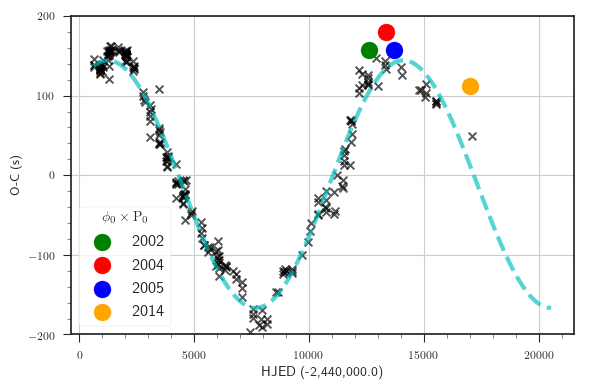

In [5]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)


# plot oc
ax1.scatter(tE-constant,oc, marker='x', c='k', alpha=2./3)
ax1.plot(x-constant, (est_amp*N.sin(2*N.pi/est_period*(x + est_phase)))+est_offset, '--c', lw=3, alpha=2./3)    

# K2 data:  in TT  
ax1.scatter(2457085.200893-constant, 49., c='k', marker='x', alpha=2./3)

# Observed times:  label=r'$\phi_0 \times \mathrm{P_0}$'
ax1.scatter(t02-constant, (Prot*24*3600.)*0.0035, color='g', s=150, marker='o',  label='2002')
ax1.scatter(t04-constant, (Prot*24*3600.)*0.0040, color='r', s=150, marker='o',  label='2004')
ax1.scatter(t05-constant, (Prot*24*3600.)*0.0035, color='b', s=150, marker='o',  label='2005')
ax1.scatter(t14-constant, (Prot*24*3600.)*0.0025, color='orange', s=150, marker='o',  label='2014')



ax1.set_ylim((-200,200))
ax1.yaxis.set_major_locator(MultipleLocator(100))
ax1.yaxis.set_minor_locator(MultipleLocator(20))
ax1.xaxis.set_minor_locator(MultipleLocator(1000))
ax1.xaxis.set_major_locator(MultipleLocator(5000))
ax1.set_ylabel('O-C (s)')
ax1.set_xlabel('HJED (-2,440,000.0)', fontsize='medium')

P.legend(fontsize='large', loc='lower left', frameon=True, title=r'$\phi_0 \times \mathrm{P_0}$')
P.grid(True)

P.tight_layout()
P.show()

> Correlated ??

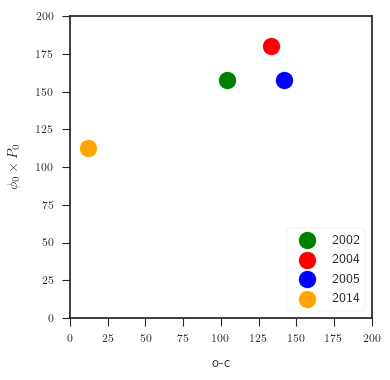

In [6]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)

ax1.scatter(est_amp*N.sin(2*N.pi/est_period*(t02 + est_phase))+est_offset, (Prot*24*3600.)*0.0035, color='g', s=150, marker='o',  label='2002')
ax1.scatter(est_amp*N.sin(2*N.pi/est_period*(t04 + est_phase))+est_offset, (Prot*24*3600.)*0.0040, color='r', s=150, marker='o',  label='2004')
ax1.scatter(est_amp*N.sin(2*N.pi/est_period*(t05 + est_phase))+est_offset, (Prot*24*3600.)*0.0035, color='b', s=150, marker='o',  label='2005')
ax1.scatter(est_amp*N.sin(2*N.pi/est_period*(t14 + est_phase))+est_offset, (Prot*24*3600.)*0.0025, color='orange', s=150, marker='o',  label='2014')

ax1.set_xlabel(r'o-c', fontsize='medium', labelpad=10)
ax1.set_ylabel(r'$\phi_0\times P_0$', fontsize='medium', labelpad=10)
ax1.set_aspect('equal')
ax1.set_xlim(0.,200)
ax1.set_ylim(0.,200)
P.legend(fontsize='medium', frameon=True, loc='lower right')
P.show()

# Predicted curves for $\propto \frac{dP}{P}$ and $\Delta\Omega/\Omega_0$ under the Applegate framework  

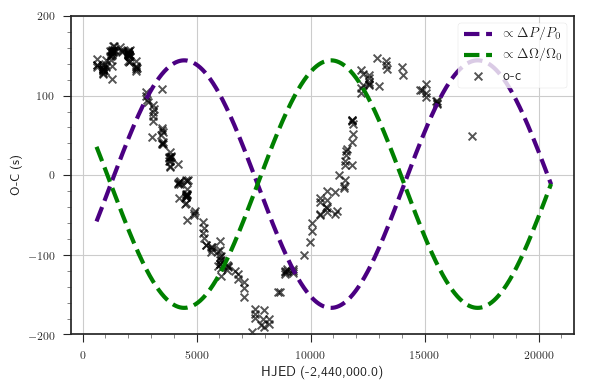

In [7]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)


ax1.plot(x-constant, est_amp*N.sin(2*N.pi/est_period*(x + est_phase)-N.pi/2)+est_offset, ls='--', c='indigo', lw=3, label="$\propto \Delta P/P_0$")    
ax1.plot(x-constant, est_amp*N.sin(2*N.pi/est_period*(x + est_phase)+N.pi/2)+est_offset, '--g', lw=3, label="$\propto \Delta\Omega/\Omega_0$")    



# plot oc
ax1.scatter(tE-constant, oc, marker='x', c='k', alpha=2./3, label='o-c')

# K2 data:  in TT  
ax1.scatter(2457085.200893-constant, 49., c='k', marker='x', alpha=2./3)

ax1.set_ylim((-200,200))
ax1.yaxis.set_major_locator(MultipleLocator(100))
ax1.yaxis.set_minor_locator(MultipleLocator(20))
ax1.xaxis.set_minor_locator(MultipleLocator(1000))
ax1.xaxis.set_major_locator(MultipleLocator(5000))
ax1.set_ylabel('O-C (s)')
ax1.set_xlabel('HJED (-2,440,000.0)', fontsize='medium')
    
P.legend(fontsize='medium', loc='upper right', frameon=True)


P.grid(True)

P.tight_layout()
P.show()



## Overlaping our shear measurements

In [8]:
# Shears obtained for each data set
dO02 = 1.6; dO02err=6; 
Oeq02 = 12.0547

dO04 = N.array((100, 129)); dO04err = N.array((5, 23)) # from stokes I and V respectively
Oeq04 = N.array((12.106, 12.116))


dO05 = N.array((73, 48)); dO05err = N.array((2, 12))
Oeq05 = N.array((12.091, 12.083))


dO14 = N.array((69, 45)); dO04err = N.array((1,3))
Oeq14 = N.array((12.087, 12.077))


# Vector with shear values
dO = N.array([dO02, dO04[0], dO04[1], dO05[0], dO05[1], dO14[0], dO14[1]])

# Time of observations in TT
time =  N.array([2452602.00000,2453337.87674,2453337.87674,2453718.72517,2453718.72517, 2457021.96287, 2457021.96287])
time -= constant

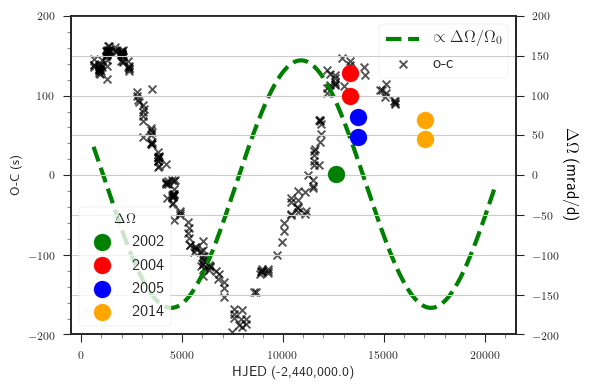

In [9]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)

# SHEAR VARIATION
ax1.plot(x-constant, est_amp*N.sin(2*N.pi/est_period*(x + est_phase)+N.pi/2)+est_offset, '--g', lw=3, label="$\propto \Delta\Omega/\Omega_0$")    

# plot oc
ax1.scatter(tE-constant, oc, marker='x', c='k', alpha=2./3, label='o-c')
# K2 data:  in TT  
ax1.scatter(2457085.200893-constant, 49., c='k', marker='x', alpha=2./3)


ax1.set_ylim((-200,200))
ax1.yaxis.set_major_locator(MultipleLocator(100))
ax1.yaxis.set_minor_locator(MultipleLocator(20))
ax1.xaxis.set_minor_locator(MultipleLocator(1000))
ax1.xaxis.set_major_locator(MultipleLocator(5000))
ax1.set_ylabel('O-C (s)')
ax1.set_xlabel('HJED (-2,440,000.0)', fontsize='medium')
    
P.legend(fontsize='large', loc='upper right', frameon=True)


ax2 = ax1.twinx()
# measurements:
ax2.scatter(t02-constant, dO02, color='g', s=150, marker='o',  label='2002')
ax2.scatter((t04-constant,)*2, dO04, color='r', s=150, marker='o',  label='2004')
ax2.scatter((t05-constant,)*2, dO05, color='b', s=150, marker='o',  label='2005')
ax2.scatter((t14-constant,)*2, dO14, color='orange', s=150, marker='o',  label='2014')
ax2.set_ylabel(r'$\Delta\Omega$ (mrad/d)', fontsize='large', color='k', rotation=270, labelpad=15)




ax2.set_ylim((-200,200))



P.legend(fontsize='large', loc='lower left', frameon=True, title=r'$\Delta\Omega$')

P.grid(True)

P.tight_layout()
P.show()

## Overlaping relative shears

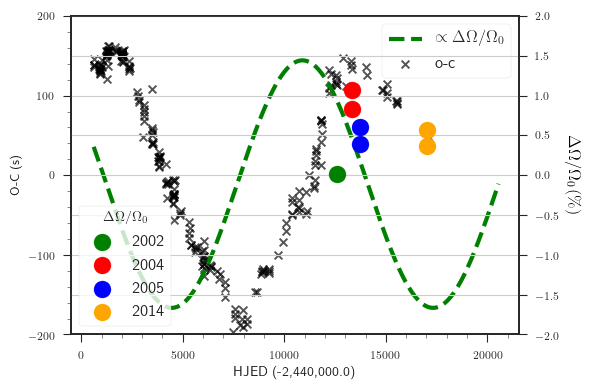

In [10]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)

# SHEAR VARIATION
ax1.plot(x-constant, est_amp*N.sin(2*N.pi/est_period*(x + est_phase)+N.pi/2)+est_offset, '--g', lw=3, label="$\propto \Delta\Omega/\Omega_0$")    

# plot oc
ax1.scatter(tE-constant, oc, marker='x', c='k', alpha=2./3, label='o-c')
# K2 data:  in TT  
ax1.scatter(2457085.200893-constant, 49., c='k', marker='x', alpha=2./3)


ax1.set_ylim((-200,200))
ax1.yaxis.set_major_locator(MultipleLocator(100))
ax1.yaxis.set_minor_locator(MultipleLocator(20))
ax1.xaxis.set_minor_locator(MultipleLocator(1000))
ax1.xaxis.set_major_locator(MultipleLocator(5000))
ax1.set_ylabel('O-C (s)')
ax1.set_xlabel('HJED (-2,440,000.0)', fontsize='medium')
    
P.legend(fontsize='large', loc='upper right', frameon=True)



ax2 = ax1.twinx()
# measurements:
ax2.scatter(t02-constant, 1.e-1*dO02/Oeq02, color='g', s=150, marker='o',  label='2002')
ax2.scatter((t04-constant,)*2, 1.e-1*dO04/Oeq04, color='r', s=150, marker='o',  label='2004')
ax2.scatter((t05-constant,)*2, 1.e-1*dO05/Oeq05, color='b', s=150, marker='o',  label='2005')
ax2.scatter((t14-constant,)*2, 1.e-1*dO14/Oeq14, color='orange', s=150, marker='o',  label='2014')
ax2.set_ylabel(r'$\Delta\Omega/\Omega_0\,(\%)$', fontsize='large', color='k', rotation=270, labelpad=15)



P.legend(fontsize='large', loc='lower left', frameon=True, title=r'$\Delta\Omega/\Omega_0$')


ax2.set_ylim((-2,2))



P.grid(True)

P.tight_layout()
P.show()

# Testing the energy ratio

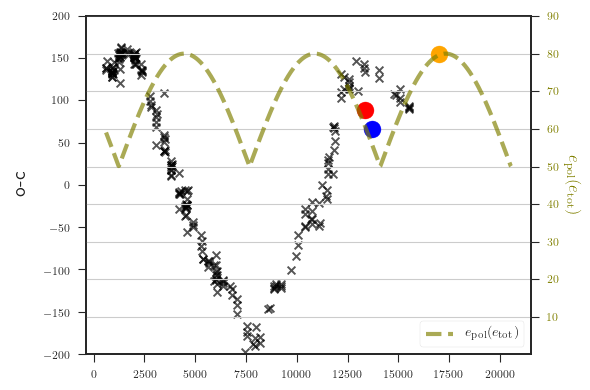

In [11]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)
# plot oc
ax1.scatter(tE-constant, oc, marker='x', c='k', alpha=2./3, label='o-c')
ax1.set_ylim((-200,200))
ax1.set_ylabel(r"o-c", fontsize='x-large', labelpad=10)
    
ax2 = ax1.twinx()
ax2.scatter(t04-constant, [65], c='r',s=150)
ax2.scatter(t05-constant, [60], c='b',s=150)
ax2.scatter(t14-constant, [80], c='orange', s=150)
ax2.plot(x-constant, N.abs(30*N.sin(2*N.pi/est_period*(x + est_phase)-N.pi/2))+50, c='olive', ls='--', lw=3, alpha=2./3, label=r"$e_\mathrm{pol}(e_\mathrm{tot})$")    
ax2.set_ylabel(r'$e_\mathrm{pol}(e_\mathrm{tot})$', fontsize='large', color='olive', rotation=270, labelpad=15)
ax2.tick_params(axis='y', labelcolor='olive')
ax2.set_ylim((0.2,90.))    
   
    
P.legend(fontsize='medium', loc='lower right', frameon=True)
P.grid(True)

P.tight_layout()
P.show()